In [27]:
### Function Imports
from OptionsFunctions import set_price_and_strike, daily_returns, compute_sigma, black_scholes, hedge_pos_and_rets, calculate_hedged_unhedged, plot_hedged_returns
import pandas as pd


In [28]:
### Call Function to Get Most Recent Stock Price and Set Strike
pair = 'USDEUR=X'
start_date = '2023-07-01'

forex_data, S_0, K = set_price_and_strike(pair, start_date, option_type = 'call')
print(forex_data)
print('The Spot Price is:', round(S_0, 4))
print('The pre-determined Strike Price is:', round(K, 4))


[*********************100%%**********************]  1 of 1 completed

          Date  USDEUR=X
0   2023-07-03   0.91680
1   2023-07-04   0.91633
2   2023-07-05   0.91870
3   2023-07-06   0.92110
4   2023-07-07   0.91822
..         ...       ...
257 2024-06-26   0.93374
258 2024-06-27   0.93632
259 2024-06-28   0.93384
260 2024-07-01   0.93151
261 2024-07-02   0.93130

[262 rows x 2 columns]
The Spot Price is: 0.9313
The pre-determined Strike Price is: 0.9499


In [29]:
### Function Call to Compute Daily Returns
daily_rets = daily_returns(forex_data)
print(daily_rets)


          Date  USDEUR=X
0   2023-07-04 -0.000513
1   2023-07-05  0.002586
2   2023-07-06  0.002612
3   2023-07-07 -0.003127
4   2023-07-10 -0.007210
..         ...       ...
256 2024-06-26  0.002157
257 2024-06-27  0.002763
258 2024-06-28 -0.002649
259 2024-07-01 -0.002495
260 2024-07-02 -0.000225

[261 rows x 2 columns]


In [30]:
### Return Computed Sigma Value
sigma = compute_sigma(daily_rets)
print('The sigma value was computed to be:', round(sigma, 5))


The sigma value was computed to be: 0.06188


In [31]:
### Call Function to Compute Option Premium and Greeks
r = 0.02
r_f = 0.01
T = 1
option_type = 'call'
option_price, delta, gamma, theta, rho, vega, prob_ITM_call, prob_ITM_put, prob_exercise_call, prob_exercise_put = black_scholes(S_0, K, r, r_f, T, sigma, option_type)

# Print and explain values
print(f"Option Type: {option_type}")
print(f"Option Price: {option_price:.4f}")
print(f"Delta: {delta:.4f} - Delta represents the sensitivity of the option's price to changes in the underlying asset's price (prob option finishes ITM)")
print(f"Gamma: {gamma:.4f} - Gamma measures the rate of change of Delta with respect to changes in the underlying price.")
print(f"Theta: {theta:.4f} - Theta measures the sensitivity of the option's price to the passage of time.")
print(f"Rho: {rho:.4f} - Rho measures the sensitivity of the option's price to changes in the risk-free interest rate.")
print(f"Vega: {vega:.4f} - Vega measures the sensitivity of the option's price to changes in the volatility of the underlying asset.")
print(f"Probability ITM (Call): {prob_ITM_call:.4f} - Probability the call option finishes In The Money.")
print(f"Probability ITM (Put): {prob_ITM_put:.4f} - Probability the put option finishes In The Money.")
print(f"Probability of Exercise (Call): {prob_exercise_call:.4f} - Probability the call option will be exercised.")
print(f"Probability of Exercise (Put): {prob_exercise_put:.4f} - Probability the put option will be exercised.")


Option Type: call
Option Price: 0.0186
Delta: 0.4448 - Delta represents the sensitivity of the option's price to changes in the underlying asset's price (prob option finishes ITM)
Gamma: 6.7982 - Gamma measures the rate of change of Delta with respect to changes in the underlying price.
Theta: -0.0151 - Theta measures the sensitivity of the option's price to the passage of time.
Rho: 0.3956 - Rho measures the sensitivity of the option's price to changes in the risk-free interest rate.
Vega: 0.3649 - Vega measures the sensitivity of the option's price to changes in the volatility of the underlying asset.
Probability ITM (Call): 0.4493 - Probability the call option finishes In The Money.
Probability ITM (Put): 0.5507 - Probability the put option finishes In The Money.
Probability of Exercise (Call): 0.4249 - Probability the call option will be exercised.
Probability of Exercise (Put): 0.5751 - Probability the put option will be exercised.


In [32]:
### Call Hedged Rets Function
long_pos = 1000  # units of currency pair (not dollars)
hedge_pos, hedged_rets = hedge_pos_and_rets(daily_rets, delta, long_pos)
print('The computed hedge position is:', round(hedge_pos, 4))
print("Hedged Returns:")
print(hedged_rets.head())


The computed hedge position is: -444.8127
Hedged Returns:
     USDEUR=X
0 -444.813172
1 -444.810073
2 -444.810047
3 -444.815786
4 -444.819869


In [33]:
### Call Calculated Hedged/Unhedged Returns Function
hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(pair, long_pos, daily_rets, delta)
print("Hedged Cumulative Returns:")
print(hedged_cumulative_rets.tail())
print("Unhedged Cumulative Returns:")
print(unhedged_cumulative_rets.tail())


Hedged Cumulative Returns:
Date
2024-06-26    1010.709045
2024-06-27    1012.259493
2024-06-28    1010.770941
2024-07-01    1009.370784
2024-07-02    1009.244458
Name: USDEUR=X, dtype: float64
Unhedged Cumulative Returns:
Date
2024-06-26    1018.477309
2024-06-27    1021.291431
2024-06-28    1018.586338
2024-07-01    1016.044883
2024-07-02    1015.815840
Name: USDEUR=X, dtype: float64


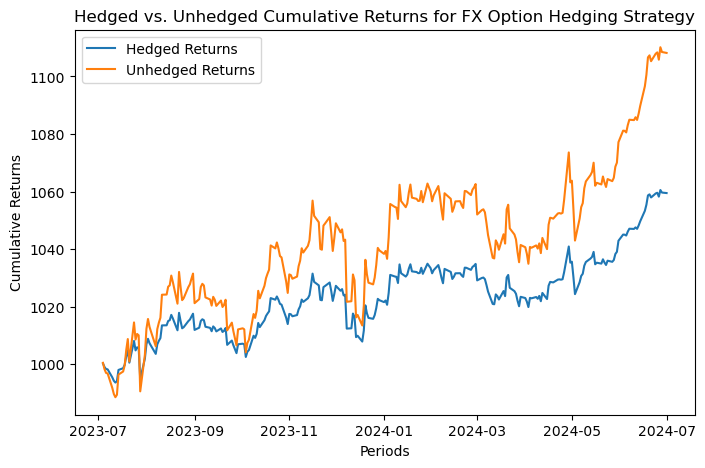

In [36]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)
